In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

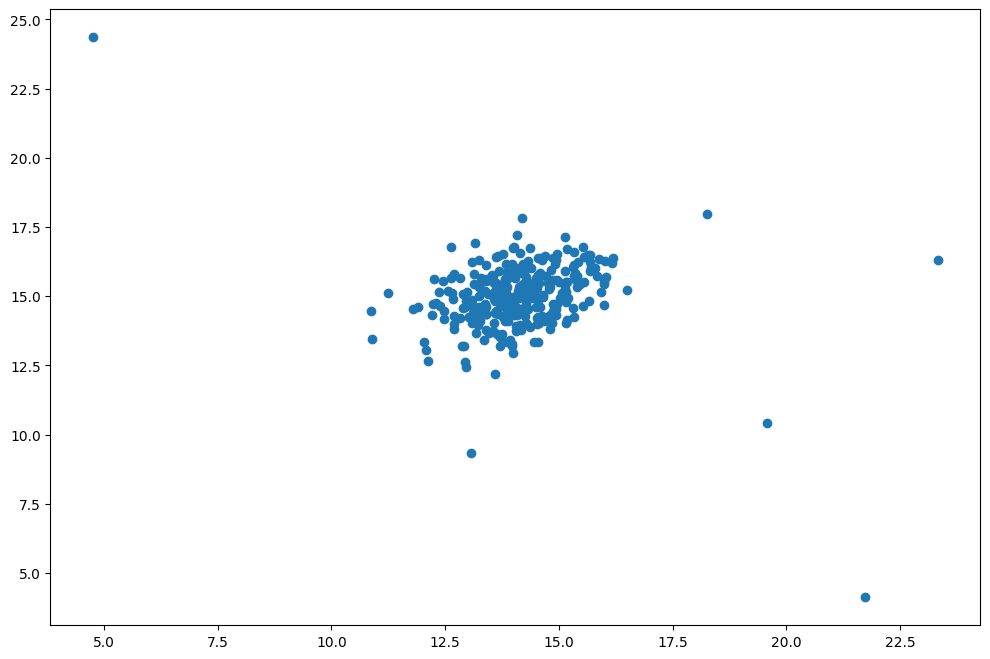

In [2]:
data = loadmat('ex4_dataset.mat')
X = data['X']
X.shape 
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])

In [3]:
def estimate_gaussian(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    return mu, sigma

In [4]:
mu, sigma = estimate_gaussian(X)
mu, sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [5]:
Xval = data['Xval']
yval = data['yval']
Xval.shape, yval.shape

((307, 2), (307, 1))

In [6]:
from scipy import stats
dist = stats.norm(mu[0], sigma[0])
dist.pdf(X[:,0])[0:50]
p = np.zeros((X.shape[0], X.shape[1]))
p[:,0] = stats.norm(mu[0], sigma[0]).pdf(X[:,0])
p[:,1] = stats.norm(mu[1], sigma[1]).pdf(X[:,1])
p.shape
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:,0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:,0])
pval[:,1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:,1])

In [7]:
def select_threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    step = (pval.max() - pval.min()) / 1000
    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon
        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
    return best_epsilon, best_f1

In [8]:
epsilon, f1 = select_threshold(pval, yval)
epsilon, f1

C:\Users\Johari\AppData\Local\Temp\ipykernel_7992\2661572806.py:11: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / (tp + fp)


(0.009566706005956842, 0.7142857142857143)

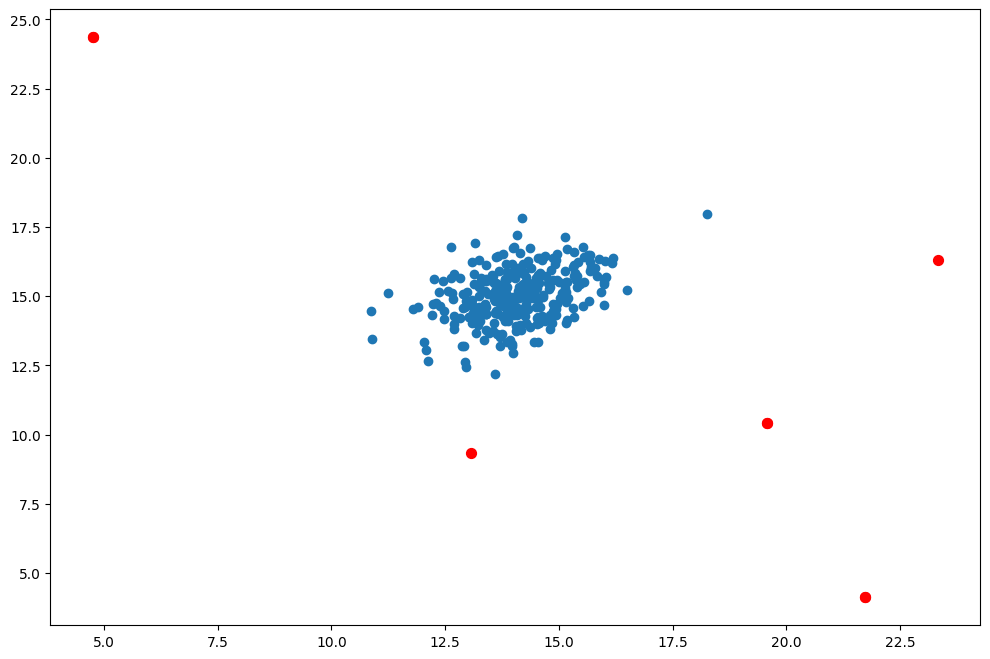

In [9]:
# indexes of the values considered to be outliers
outliers = np.where(p < epsilon)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])
ax.scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='o')